# Music Service

The goal of this project was to check the validity of three hypotheses about the music listening habits of users in Moscow and Saint Petersburg.

1. Listener activity depends on the day of the week, and this purported relationship expresses itself differently in Moscow and Saint Petersburg.
2. On Monday morning and on Friday evening there are specific genres that tend to be chosen, and furthermore these genres differ between Moscow and Saint Petersburg.
3. Moscow and Saint Petersburg prefer different genres more generally; listeners in Moscow more often choose pop music, and Saint Petersburg more often choose Russian rap.

The dataset was received with a variety of problems and imperfections. As such, the project will be completed in three steps:
1. Evaluation of quality of dataset
2. Datacleaning
3. Hypothesis verification


This was my first project. As it is rather simple in its goals, this didn't affect the overall success of the project. One thing worth mentioning, however, is the method of hypothesis verification, which could be done in a more structured and reliable manner. In terms of style, it is worth mentioning that in this and other early projects I wrote a rather large number of comments within the code itself, which I avoid doing in later projects.



## Обзор данных





In [3]:
# импортирование библиотек
import pandas as pd
import seaborn as sb

In [4]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/yandex_music_project.csv')

In [5]:
# получение первых 10 строк таблицы df
display(df.head(10))

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [6]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
  userID    65079 non-null object
Track       63848 non-null object
artist      57876 non-null object
genre       63881 non-null object
  City      65079 non-null object
time        65079 non-null object
Day         65079 non-null object
dtypes: object(7)
memory usage: 3.5+ MB


И так, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Отдельные слова (в одной переменной) не разделены; для этого принято использовать змеиный регистр (`for_example`)



Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных


### Стиль заголовков


In [7]:
# перечень названий столбцов таблицы df
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

In [8]:
# переименование столбцов
df = df.rename(columns={'  userID':'user_id', 'Track':'track', '  City  ':'city', 'Day':'day'})

In [9]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Пропуски значений


In [10]:
# подсчёт пропусков
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

In [11]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['track', 'artist', 'genre']
for column in columns_to_replace:
    df[column] = df[column].fillna('unknown')

In [12]:
# подсчёт пропусков
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Дубликаты


In [13]:
# подсчёт явных дубликатов
print('Начальное количество явных дубликатов:', df.duplicated().sum())

Начальное количество явных дубликатов: 3826


In [14]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)

In [15]:
# проверка на отсутствие дубликатов
print('Новое количество явных дубликатов:', df.duplicated().sum())

Новое количество явных дубликатов: 0


In [16]:
# Просмотр уникальных названий жанров
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

In [17]:
# Функция для замены неявных дубликатов
def replace_wrong_genres(wrong_genres, correct_genre):
    df['genre'] = df['genre'].replace(wrong_genres, correct_genre)

In [18]:
# Устранение неявных дубликатов
replace_wrong_genres(['hip', 'hop', 'hip-hop'], 'hiphop')  # устранение дубликатов жанра hiphop

# устранение других ошибок в названиях
replace_wrong_genres('электроника', 'electronic')
replace_wrong_genres('ïîï', 'unknown')
# с помошью онлайн дешифровщика нашёл, что 'ïîï' возможно значит 'ОНО', но считаю это тоже непознатым жанром


In [19]:
# Проверка на неявные дубликаты
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.


## Проверка гипотез

### Сравнение поведения пользователей двух столиц

In [20]:
# Подсчёт прослушиваний в каждом городе
df.groupby('city')['genre'].count()

city
Moscow              42741
Saint-Petersburg    18512
Name: genre, dtype: int64

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.


In [21]:
# Подсчёт прослушиваний в каждый из трёх дней
df.groupby('day')['genre'].count().to_frame()

,genre
day,
Friday,21840
Monday,21354
Wednesday,18059


In [23]:
 # Объявляется функция с двумя параметрами: day, city.
def number_tracks(day, city):
    
# значение в столбце 'day' равно параметру day и одновременно значение
# в столбце 'city' равно параметру city (используйте последовательную фильтрацию
# с помощью логической индексации).
    track_list = df[(df['day'] == day) & (df['city'] == city)] 

# В переменной track_list_count сохраняется число значений столбца 'user_id',
# рассчитанное методом count() для таблицы track_list.
    track_list_count = track_list['user_id'].count()

# Функция возвращает число - значение track_list_count.
    return track_list_count 


# Функция для подсчёта прослушиваний для конкретного города и дня.
# С помощью последовательной фильтрации с логической индексацией она 
# сначала получит из исходной таблицы строки с нужным днём,
# затем из результата отфильтрует строки с нужным городом,
# методом count() посчитает количество значений в колонке user_id. 
# Это количество функция вернёт в качестве результата

In [24]:
# количество прослушиваний в Москве по понедельникам
number_tracks('Monday', 'Moscow')

15740

In [25]:
# количество прослушиваний в Санкт-Петербурге по понедельникам
number_tracks('Monday', 'Saint-Petersburg')

5614

In [26]:
# количество прослушиваний в Москве по средам
number_tracks('Wednesday', 'Moscow')

11056

In [27]:
# количество прослушиваний в Санкт-Петербурге по средам
number_tracks('Wednesday', 'Saint-Petersburg')

7003

In [28]:
# количество прослушиваний в Москве по пятницам
number_tracks('Friday', 'Moscow')

15945

In [29]:
# количество прослушиваний в Санкт-Петербурге по пятницам
number_tracks('Friday', 'Saint-Petersburg')

5895

In [30]:
# Таблица с результатами
number_tracks_columns = ['city', 'monday', 'wednesday', 'friday']
number_tracks_data = [['Saint-Petersburg', 5614, 7003, 5895], ['Moscow', 15740, 11056, 15945]]
number_tracks_df = pd.DataFrame(number_tracks_data, columns=number_tracks_columns)
display(number_tracks_df)

,city,monday,wednesday,friday
0,Saint-Petersburg,5614,7003,5895
1,Moscow,15740,11056,15945


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

In [31]:
# получение таблицы moscow_general из тех строк таблицы df, 
# для которых значение в столбце 'city' равно 'Moscow'
moscow_general = df[df['city'] == 'Moscow']


In [32]:
# получение таблицы spb_general из тех строк таблицы df,
# для которых значение в столбце 'city' равно 'Saint-Petersburg'
spb_general = df[df['city'] == 'Saint-Petersburg']

In [33]:
# Объявление функции genre_weekday() с параметрами table, day, time1, time2,
# которая возвращает информацию о самых популярных жанрах в указанный день в
# заданное время:
def genre_weekday(table, day, time1, time2):
    
# 1) в переменную genre_df сохраняются те строки переданного датафрейма table, для
#    которых одновременно:
#    - значение в столбце day равно значению аргумента day
#    - значение в столбце time больше значения аргумента time1
#    - значение в столбце time меньше значения аргумента time2
#    Используйте последовательную фильтрацию с помощью логической индексации.
    genre_df = table[table['day'] == day]
    genre_df = genre_df[genre_df['time'] >= time1]
    genre_df = genre_df[genre_df['time'] <= time2]

# 2) сгруппировать датафрейм genre_df по столбцу genre, взять один из его
#    столбцов и посчитать методом count() количество записей для каждого из
#    присутствующих жанров, получившийся Series записать в переменную
#    genre_df_count
    genre_df_count = genre_df.groupby('genre')['genre'].count()


# 3) отсортировать genre_df_count по убыванию встречаемости и сохранить
#    в переменную genre_df_sorted
    genre_df_sorted = genre_df_count.sort_values(ascending=False)

# 4) вернуть Series из 10 первых значений genre_df_sorted, это будут топ-10
#    популярных жанров (в указанный день, в заданное время)
    return genre_df_sorted[:10]

In [45]:
# вызов функции для утра понедельника в Москве (вместо df — таблица moscow_general)
# объекты, хранящие время, являются строками и сравниваются как строки
# пример вызова: genre_weekday(moscow_general, 'Monday', '07:00', '11:00')
genre_weekday(moscow_general, 'Monday', '07:00', '11:00').to_frame()

,genre
genre,
pop,781
dance,549
electronic,480
rock,474
hiphop,286
ruspop,186
world,181
rusrap,175
alternative,164


In [46]:
# вызов функции для утра понедельника в Петербурге (вместо df — таблица spb_general)
genre_weekday(spb_general, 'Monday', '07:00', '11:00').to_frame()

,genre
genre,
pop,218
dance,182
rock,162
electronic,147
hiphop,80
ruspop,64
alternative,58
rusrap,55
jazz,44


In [47]:
# вызов функции для вечера пятницы в Москве
genre_weekday(moscow_general, 'Friday', '17:00', '23:00').to_frame()

,genre
genre,
pop,713
rock,517
dance,495
electronic,482
hiphop,273
world,208
ruspop,170
alternative,163
classical,163


In [48]:
# вызов функции для вечера пятницы в Петербурге
genre_weekday(spb_general, 'Friday', '17:00', '23:00').to_frame()

,genre
genre,
pop,256
rock,216
electronic,216
dance,210
hiphop,97
alternative,63
jazz,61
classical,60
rusrap,59


**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

In [38]:
# одной строкой: группировка таблицы moscow_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в moscow_genres

moscow_genres = moscow_general.groupby('genre')['genre'].count().sort_values(ascending=False)

In [49]:
# просмотр первых 10 строк moscow_genres
moscow_genres[:10].to_frame()

,genre
genre,
pop,5892
dance,4435
rock,3965
electronic,3786
hiphop,2096
classical,1616
world,1432
alternative,1379
ruspop,1372


In [40]:
# одной строкой: группировка таблицы spb_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в spb_genres
spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending=False)

Выведите на экран первые десять строк `spb_genres`:

In [50]:
# просмотр первых 10 строк spb_genres
spb_genres[:10].to_frame()

,genre
genre,
pop,2431
dance,1932
rock,1879
electronic,1737
hiphop,960
alternative,649
classical,646
rusrap,564
ruspop,538


Я хотел делать данные более читаемыми, так что я создал таблицу и две диаграммы. Думаю, что в таком формате данные легче понимать.


In [42]:
 # подсчёт суммой прослушиваний всех жанров в топ-10 в Москве
moscow_top10_total = moscow_genres[:10].sum()
moscow_percents_data = []

 # подсчёт суммой прослушиваний всех жанров в топ-10 в СПБ
spb_top10_total = spb_genres[:10].sum()
spb_percents_data = []

# перевод значений каждого жанра в moscow_genres и spb_genres с количества прослушиваний на процент прослушиваний по отношению к общей сумме прослушиваний всех жанров в топ-10 
for i in range(10):
    moscow_percents_data.append(moscow_genres[i]/moscow_top10_total*100)
    spb_percents_data.append(spb_genres[i]/spb_top10_total*100)

# создание DataFrames с процентами прослушиваний в топ-10 для обоих городов
moscow_top10_percents = pd.DataFrame(moscow_percents_data, index=moscow_genres[:10].index, columns=['percent'])
spb_top10_percents = pd.DataFrame(spb_percents_data, index=spb_genres[:10].index, columns=['percent'])

# сложение таблиц в одну таблицу для легчего сравнения значений
merged_top10_percents = spb_top10_percents.merge(moscow_top10_percents, on='genre', suffixes=['_spb','_moscow'])

merged_top10_percents


,percent_spb,percent_moscow
genre,,
pop,20.513037,21.714454
dance,16.302422,16.344807
rock,15.855202,14.612663
electronic,14.656991,13.952974
hiphop,8.100582,7.724626
alternative,5.476331,5.082185
classical,5.451017,5.955628
rusrap,4.759092,4.278765
ruspop,4.539701,5.056387


Топ-10 жанров по популярности в Москве:


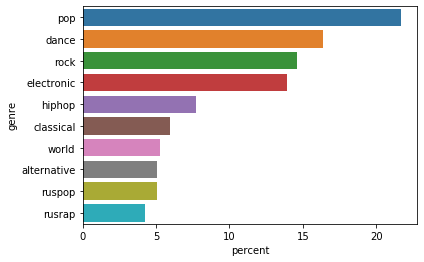

In [43]:

# создание стольбчатой диаграммы московских данных
moscow_top10_plot = sb.barplot(x='percent', y=moscow_top10_percents.index, data=moscow_top10_percents)

# вывод диаграммы с этикеткой
print("Топ-10 жанров по популярности в Москве:")
moscow_top10_plot



Топ-10 жанров по популярости в Санкт Петербурге:


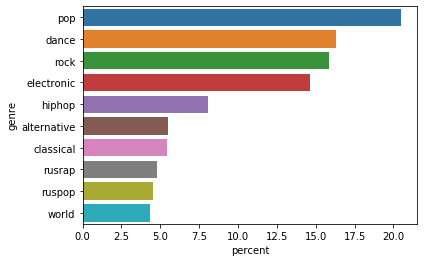

In [44]:
# создание стольбчатой диаграммы питерских данных
spb_top10_plot = sb.barplot(x='percent', y=spb_top10_percents.index, data=spb_top10_percents)

# вывод диаграммы с этикеткой
print("Топ-10 жанров по популярости в Санкт Петербурге:")
spb_top10_plot

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 
